# 前言
本节学习 PyEcharts. 注意今后要注重主动性学习, 学习的材料包括但不限于:
+ 视频
+ 技术博客
+ 在线书籍
+ 电子/纸质书籍
+ 写学习笔记
+ 与人分享
+ 一些资源网站
+ 等等.

> [原文链接](https://mp.weixin.qq.com/s/5GJKIt5OkMh7C3xqoTJsTA)[官方网站链接1](https://pyecharts.org/#/) [链接2](http://pyecharts.herokuapp.com)
官方网站上有许多丰富的示例, 遇到具体问题可以参照学习一下.

注意如果在命令行下直接用 'pip install pyecharts' 后虽然会安装成功, 但是
其子模块却不能导入(有点奇怪, 最新版的包为什么会出现这样的问题), 具体解决办法点击[这里](https://github.com/pyecharts/pyecharts/issues/1)

本次使用的 pyecharts 的版本为 v0.5 (最新版没有 Overlap) [参考](https://github.com/pyecharts/pyecharts).

+ Bokeh 系列作者弃之不写, 主要和 PyEcharts 类似.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from datetime import datetime
import talib as ta
# 1.x 
#from pyecharts.charts import Line, Kline, Pie, Grid, Timeline, WordCloud
# 0.5.x
from pyecharts import Line, Kline, Pie, Grid, Overlap, Timeline, WordCloud, enable_nteract
enable_nteract()


In [99]:
# 颜色设置
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

# 1 Matplotlib Vs PyEcharts
## 1.1 K 线图

In [57]:
from yahoofinancials import YahooFinancials

In [58]:
start_date = '2016-01-01'
end_date = '2019-05-13'

currencies = ['EURUSD=X', 'JPY=X', 'CNY=X', 'GBPUSD=X']
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'XRP-USD']

In [59]:
FX_obj = YahooFinancials(currencies)
CRX_obj = YahooFinancials(cryptocurrencies)

FX_daily = FX_obj.get_historical_price_data(start_date, end_date, 'daily')
CFX_daily = CRX_obj.get_historical_price_data(start_date, end_date, 'daily')

In [100]:
FX_daily

{'EURUSD=X': {'eventsData': {},
  'firstTradeDate': {'formatted_date': '2003-12-01', 'date': 1070236800},
  'currency': 'USD',
  'instrumentType': 'CURRENCY',
  'timeZone': {'gmtOffset': 3600},
  'prices': [{'date': 1451606400,
    'high': 1.0866966247558594,
    'low': 1.0859060287475586,
    'open': 1.0859060287475586,
    'close': 1.0859060287475586,
    'volume': 0,
    'adjclose': 1.0859060287475586,
    'formatted_date': '2016-01-01'},
   {'date': 1451865600,
    'high': 1.094599723815918,
    'low': 1.0805997848510742,
    'open': 1.0855052471160889,
    'close': 1.0853991508483887,
    'volume': 0,
    'adjclose': 1.0853991508483887,
    'formatted_date': '2016-01-04'},
   {'date': 1451952000,
    'high': 1.0841047763824463,
    'low': 1.0712006092071533,
    'open': 1.082602620124817,
    'close': 1.0827549695968628,
    'volume': 0,
    'adjclose': 1.0827549695968628,
    'formatted_date': '2016-01-05'},
   {'date': 1452038400,
    'high': 1.0772031545639038,
    'low': 1.072

In [61]:
CFX_daily

{'BTC-USD': {'eventsData': {},
  'firstTradeDate': {'formatted_date': '2010-07-16', 'date': 1279321200},
  'currency': 'USD',
  'instrumentType': 'CRYPTOCURRENCY',
  'timeZone': {'gmtOffset': 3600},
  'prices': [{'date': 1451606400,
    'high': 437.95001220703125,
    'low': 425.8599853515625,
    'open': 429.95001220703125,
    'close': 433.989990234375,
    'volume': 20334286,
    'adjclose': 433.989990234375,
    'formatted_date': '2016-01-01'},
   {'date': 1451692800,
    'high': 437.42999267578125,
    'low': 430.7300109863281,
    'open': 433.989990234375,
    'close': 433.7200012207031,
    'volume': 14566820,
    'adjclose': 433.7200012207031,
    'formatted_date': '2016-01-02'},
   {'date': 1451779200,
    'high': 434.1400146484375,
    'low': 423.0899963378906,
    'open': 433.7200012207031,
    'close': 430.70001220703125,
    'volume': 23490162,
    'adjclose': 430.70001220703125,
    'formatted_date': '2016-01-03'},
   {'date': 1451865600,
    'high': 435.260009765625,
   

In [101]:
type(CFX_daily)

dict

In [102]:
def data_converter(price_data, code, asset):
    # convert raw data to dataframe
    if asset == 'FX':
        code = str(code[3:] if code[:3]=='USD' else code) + '=X'
    
    columns = ['open', 'close', 'low', 'high']
    price_dict = price_data[code]['prices']
    index = [p['formatted_date'] for p in price_dict]
    price = [[p[c] for c in columns] for p in price_dict]
    
    data = pd.DataFrame(price,
                       index=pd.Index(index, name='date'),
                       columns=pd.Index(columns, name='OHLC'))
    return data

# 此段解释具体见原文

In [103]:
curr = 'USDCNY'
data = data_converter(FX_daily, curr, 'FX')
data.head(3).append(data.tail(3))

OHLC,open,close,low,high
date,,,,
2016-01-01,6.4837,6.4837,6.4837,6.4837
2016-01-04,6.4837,6.4837,6.4837,6.5256
2016-01-05,6.5254,6.5254,6.5095,6.5254
2019-05-08,6.7820,6.7820,6.7819,6.8288
2019-05-09,6.8175,6.8265,6.7953,6.8276
2019-05-12,6.8141,6.8231,6.8141,6.8808


### Matplotlib 图

In [104]:
def mpl_Kline(curr, data):
    
    fig = plt.figure(figsize=(16,6), dpi=100)
    ax = fig.add_axes([0,1,1,1])
    ax.set_title(curr + '-K Line', fontsize=15)
    ax.set_xlim(-1, len(data)+1)
    
    for i in range(len(data)):
        open, close, high, low = data.iloc[i,0], data.iloc[i,1], data.iloc[i,3], data.iloc[i,2]
        
        if close > open:
            ax.add_patch(patches.Rectangle((i-0.2, open), 0.4, close-open, fill=False, color=r_hex))
            ax.plot([i,i], [low, open], r_hex)
            ax.plot([i,i], [close, high], r_hex)
        else:
            ax.add_patch(patches.Rectangle((i-0.2, close), 0.4, open-close, color=dt_hex))
            ax.plot([i,i], [low, high], color=dt_hex)
                         
    ax.set_xticks(range(0,len(data),10))
    ax.set_xticklabels([data.index[i] for i in ax.get_xticks()], rotation=90)
     
    return ax

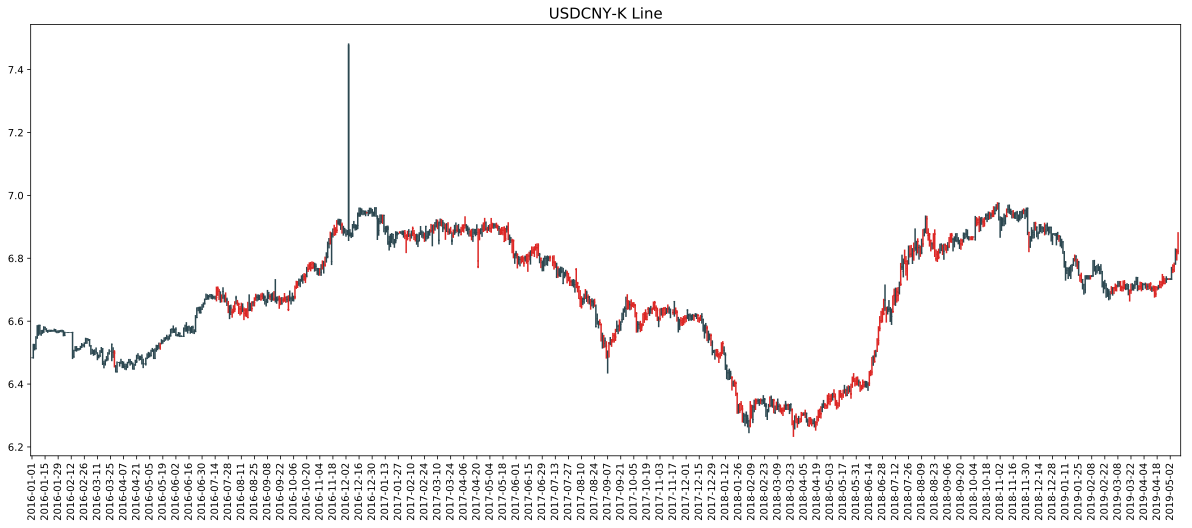

In [105]:
mpl_Kline(curr, data)

### PyEcharts 图

In [108]:
date = data.index
price = data.values

kline = Kline(curr + 'Chart', title_pos='center')
kline.add('K-line', date, price, tooltip_tragger='axis', is_datazoom_show=True,
         legend_pos='right', legend_orient='vertical', lengend_text_size=10)

line2 = Line()
features = ['high', 'low']

for feature in features:
    line2.add(feature, date, data[feature], tooltip_tragger='axis')
  

# 0.5.x 版本
overlap = Overlap(width=1000, height=400)
overlap.add(kline)
overlap.add(line2)
overlap.render(path=u'pyecharts images/USDCNY Chart.html')


'''
# 1.0.x 版本
grid = Grid(width=1000, height=400)
grid.add(kline, grid_top='100%')
grid.add(line2, grid_top='100%', grid_bottom='100%')
grid.render(path=u'pyecharts images/USDCNY Chart2.html')
'''
# 在 jupyter notebook 中出不了图是什么鬼? 过后试着解决一下.

## 1.2 移动均线图
### 不同窗口的 MA

In [68]:
label ='BTC-USD'
data = data_converter(CFX_daily, label, 'CFX')
data.head(3).append(data.tail(3))

OHLC,open,close,low,high
date,,,,
2016-01-01,429.950012,433.989990,425.859985,437.950012
2016-01-02,433.989990,433.720001,430.730011,437.429993
2016-01-03,433.720001,430.700012,423.089996,434.140015
2019-05-10,6358.290039,7191.359863,6357.020020,7394.939941
2019-05-11,7191.359863,6977.629883,6793.209961,7541.609863
2019-05-12,6977.629883,7806.359863,6873.419922,8127.750000


### Matplotlib 图

In [69]:
def mpl_MA(label, data, *window_periods):
    
    fig = plt.figure(figsize=(16,6), dpi=100)
    ax = fig.add_axes([0,1,1,1])
    ax.set_title(label + ': Moving Average', fontsize=15)
    ax.set_xlim(-1, len(data)+1)
    
    close = np.array(data['close'])
    
    ax.plot(close, linewidth=1, label='Close')
    
    for wp in window_periods:
        MA = ta.MA(close, timeperiod=wp)
        ax.plot(MA, linewidth=1, label='MA'+str(wp))
        
    ax.legend(loc=0)

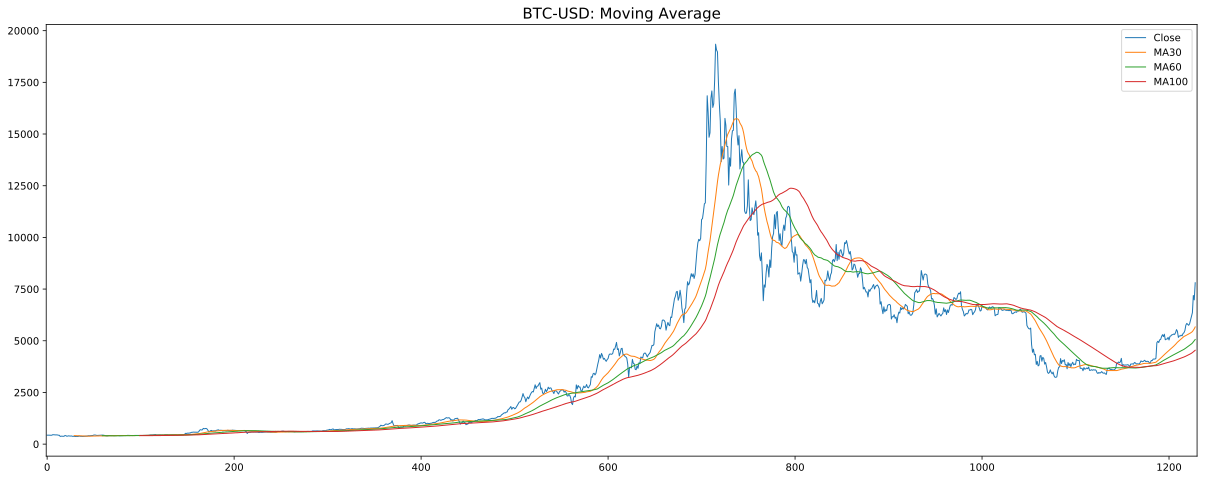

In [70]:
mpl_MA(label, data, 30,60,100)

### PyEcharts 图

In [71]:
date = data.index
price = data['close'].values

line = Line(label+' Chart', title_pos='center')
line.add('Close', date, price, tooltip_tragger='axis', is_datazoom_show=True,
        legend_pos='right', legend_orient='vertical', legend_text_size=10)

line2 = Line()
window_periods = [30, 60, 100]

for wp in window_periods:
    MA_price = ta.MA(price, timeperiod=wp)
    line2.add('MA'+str(wp), date, MA_price, tooltip_tragger='axis')
    
overlap = Overlap(width=1000, height=400)
overlap.add(line)
overlap.add(line2)
overlap.render(path=u'pyecharts images/BTCUSD Chart.html')

### 不同类型的 MA

In [72]:
label = 'ETH-USD'
data = data_converter(CFX_daily, label, 'CFX')
data.head(3).append(data.tail(3))

OHLC,open,close,low,high
date,,,,
2016-01-01,0.948800,0.920000,0.918400,0.948800
2016-01-02,0.920000,0.954700,0.920000,0.954700
2016-01-03,0.954700,0.960000,0.950600,0.970000
2019-05-10,172.500000,192.440002,172.470001,205.880005
2019-05-11,192.440002,188.139999,183.070007,203.139999
2019-05-12,188.139999,195.830002,185.789993,207.889999


### Matplotlib 图

In [73]:
def getMAtype(MA):
    
    return 0 if MA=='SMA' else 1 if MA=='EMA' else 2 if MA=='WMA' \
            else 3 if MA=='DEMA' else 4 if MA=='TEMA' else 5 if MA=='TRIMA' \
            else 6 if MA=='KAMA' else 7 if MA=='MAMA' else 0

In [74]:
def mpl_XMA(label, data, wp=5, *MA_type):
    
    fig = plt.figure(figsize=(16,6), dpi=100)
    ax = fig.add_axes([0,1,1,1])
    ax.set_title(label + ': Moving Average', fontsize=15)
    ax.set_xlim(-1, len(data)+1)
    
    close = np.array(data['close'])
    ax.plot(close, linewidth=1, label='Close')
    
    for MA in MA_type:
        matype = getMAtype(MA)
        MA_ = ta.MA(close, timeperiod=wp, matype=matype)
        ax.plot(MA_, linewidth=1, label=MA+str(wp))
        
    ax.legend(loc=0)

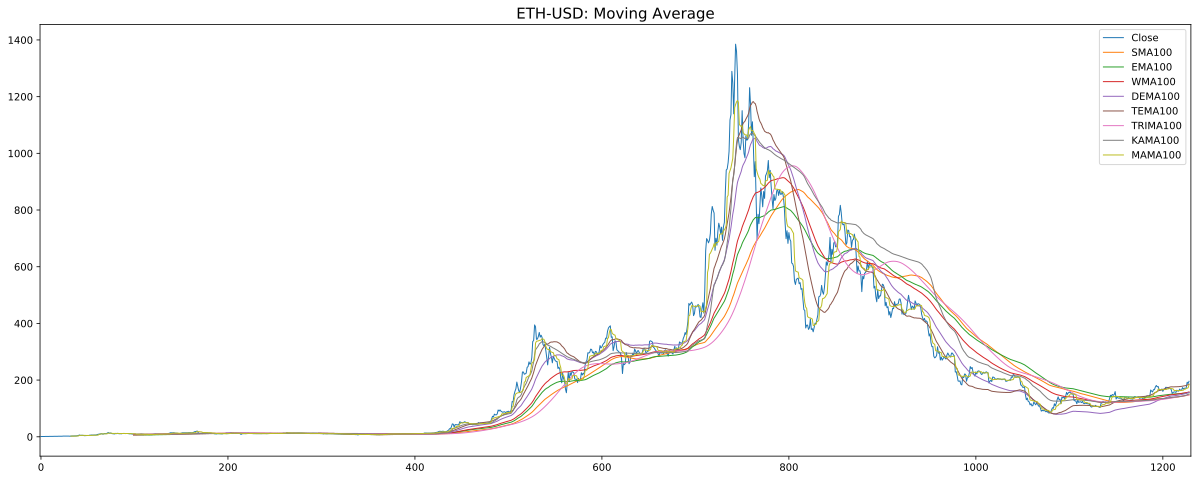

In [75]:
mpl_XMA(label, data, 100,
       'SMA','EMA', 'WMA', 'DEMA',
       'TEMA', 'TRIMA', 'KAMA', 'MAMA')

### PyEcharts 图

In [76]:
date = data.index
price = data['close'].values

line = Line(label+' Chart', title_pos='center')
line.add('Close', date, price, tooltip_tragger='axis', is_datazoom_show=True,
        legend_pos='right', legend_orient='vertical', legend_text_size=10)

line2 = Line()
wp = 100
MA_type = ['SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 'MAMA']

for MA in MA_type:
    matype = getMAtype(MA)
    MA_price = ta.MA(price, timeperiod=wp, matype=matype)
    line2.add(MA+str(wp), date, MA_price, tooltip_tragger='axis')
    
overlap = Overlap(width=1000, height=400)
overlap.add(line)
overlap.add(line2)
overlap.render(path=u'pyecharts images/ETHUSD Chart.html')

## 1.3 布林带图

In [77]:
data = pd.read_csv('data for pyecharts/1Y_Stock_Data.csv',
                  parse_dates=[0],
                  dayfirst=True)
data.head().append(data.tail())

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2018-02-26,AAPL,176.350006,179.389999,176.210007,178.970001,176.285675,38162200
1,2018-02-27,AAPL,179.100006,180.479996,178.160004,178.389999,175.714386,38928100
2,2018-02-28,AAPL,179.259995,180.619995,178.050003,178.119995,175.448410,37782100
3,2018-03-01,AAPL,178.539993,179.779999,172.660004,175.000000,172.375214,48802000
4,2018-03-02,AAPL,172.800003,176.300003,172.449997,176.210007,173.567078,38454000
1255,2019-02-20,GS,198.729996,199.300003,197.509995,198.600006,198.600006,2266000
1256,2019-02-21,GS,198.970001,199.449997,195.050003,196.360001,196.360001,2785900
1257,2019-02-22,GS,196.600006,197.750000,195.199997,196.000000,196.000000,2626600
1258,2019-02-25,GS,198.000000,201.500000,197.710007,198.649994,198.649994,3032200
1259,2019-02-26,GS,198.470001,200.559998,196.550003,198.899994,198.899994,2498000


### Matplotlib 图

In [78]:
def mpl_BBAND(code, data, wp=5, MAtype='SMA'):
    
    stock = data[data['Symbol']==code]
    
    fig = plt.figure(figsize=(16,6), dpi=100)
    ax1 = fig.add_axes([0,1,1,1])
    ax1.set_title(code + '- Bollinger Band', fontsize=15)
    ax1.set_xlim(-1, len(stock)+1)
    
    for i in range(len(stock)):
        open, close, high, low = stock.iloc[i,2], stock.iloc[i,5], stock.iloc[i,3], stock.iloc[i,4]
        
        if close > open:
            ax1.add_patch(patches.Rectangle((i-0.2, open), 0.4, close-open, fill=False, color=r_hex))
            ax1.plot([i, i], [low, open], r_hex)
            ax1.plot([i,i], [close, high], r_hex)
        else:
            ax1.add_patch(patches.Rectangle((i-0.2, close), 0.4, open-close, color=dt_hex))
            ax1.plot([i,i], [low, high], color=dt_hex)
            
    ax1.set_xticks(range(0, len(stock),10))
    ax1.set_xticklabels([(stock.iloc[i,0]).strftime('%Y-%m-%d') for i in ax1.get_xticks()], rotation=90)
    
    matype = getMAtype(MAtype)
    
    ub, mb, lb = ta.BBANDS(np.array(stock['Close']), timeperiod=wp, nbdevup=2, matype=matype)
    
    ax2 = ax1.twinx()
    ax2.plot(ub, color=tl_hex, linewidth=2, label='Upper Band')
    ax2.plot(mb, color='green', linewidth=2, label='Middle Band')
    ax2.plot(lb, color=o_hex, linewidth=2, label='Lower Band')
    ax2.legend(loc=0)

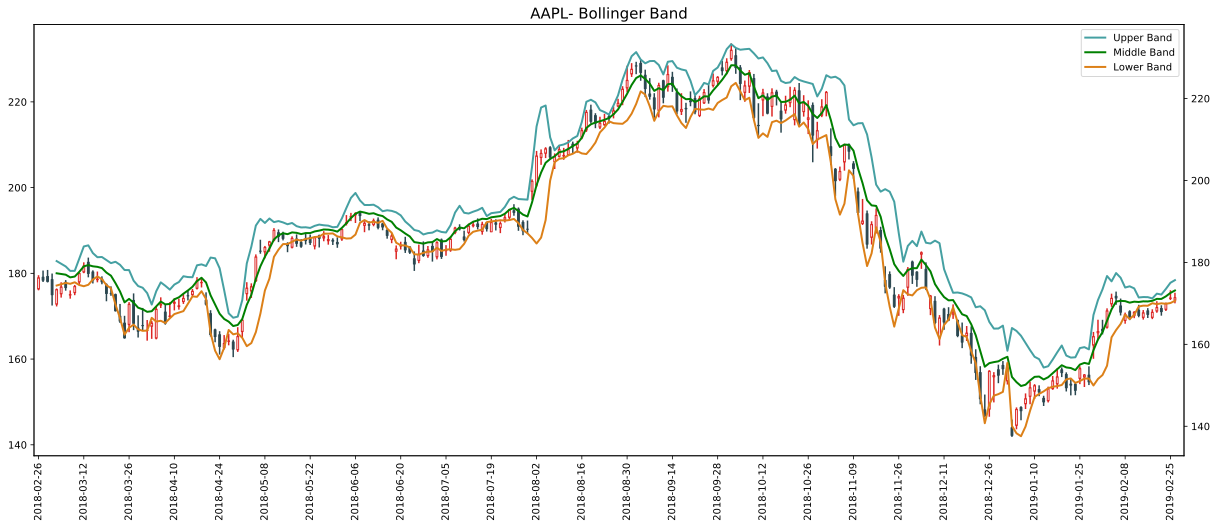

In [79]:
mpl_BBAND('AAPL', data, MAtype='EMA')

### PyEcharts 图

In [80]:
code = 'AAPL'
stock = data[data['Symbol']==code]

date = stock['Date'].dt.strftime('%d-%b-%Y')
price = stock[['Open', 'Close', 'Low', 'High']].values

kline = Kline(code + ' Chart', title_pos='center')
kline.add('KLine', date, price, tooltip_tragger='axis', is_datazoom_show=True,
         legend_pos='right', legend_orient='vertical', legend_text_size=10)

wp = 5
MAtype = 'EMA'
matype = getMAtype(MAtype)

ub, mb, lb = ta.BBANDS(np.array(stock['Close']),
                     timeperiod=wp, nbdevup=2, nbdevdn=2, matype=matype)

line2 = Line()
line2.add('Upper Band', date, ub, tooltip_tragger='axis')
line2.add('Middle Band', date, mb, tooltip_tragger='axis')
line2.add('Lower Band', date, lb, tooltip_tragger='axis')

overlap = Overlap(width=1000, height=400)
overlap.add(kline)
overlap.add(line2)
overlap.render(path=u'pyecharts images/Bollinger Band.html')

## 1.4 相对强弱指标
### Matplotlib 图

In [81]:
def mpl_RSI(code, data, wp=14):
    
    stock = data[data['Symbol']==code]
    
    fig = plt.figure(figsize=(16,6), dpi=100)
    ax1 = fig.add_axes([0,1,1,1])
    ax1.set_title(code + '- RSI', fontsize=15)
    ax1.set_xlim(-1, len(stock)+1)
    
    for i in range(len(stock)):
        open, close, high, low = stock.iloc[i,2], stock.iloc[i,5], stock.iloc[i,3],stock.iloc[i,4]
        
        if close > open:
            ax1.add_patch(patches.Rectangle((i-0.2, open), 0.4, close-open, fill=False, color=r_hex))
            ax1.plot([i,i],[low, open], r_hex)
            ax1.plot([i,i],[close,high],r_hex)
        else:
            ax1.add_patch(patches.Rectangle((i-0.2, close),0.4, open-close, color=dt_hex))
            ax1.plot([i,i],[low, high], color=dt_hex)
            
    ax1.set_xticks(range(0, len(stock),10))
    ax1.set_xticklabels([(stock.iloc[i,0]).strftime('%Y-%m-%d') for i in ax1.get_xticks()], rotation=90)
    
    RSI = ta.RSI(np.array(stock['Close']), timeperiod=wp)
    
    ax2 = ax1.twinx()
    ax2.plot(RSI, color='black', linewidth=2, label='RSI ('+str(wp)+' days)', alpha=0.3)
    ax2.plot(30*np.ones(np.shape(RSI)), color='black', linewidth=1)
    ax2.plot(70*np.ones(np.shape(RSI)), color='black', linewidth=1)
    ax2.legend(loc=0)

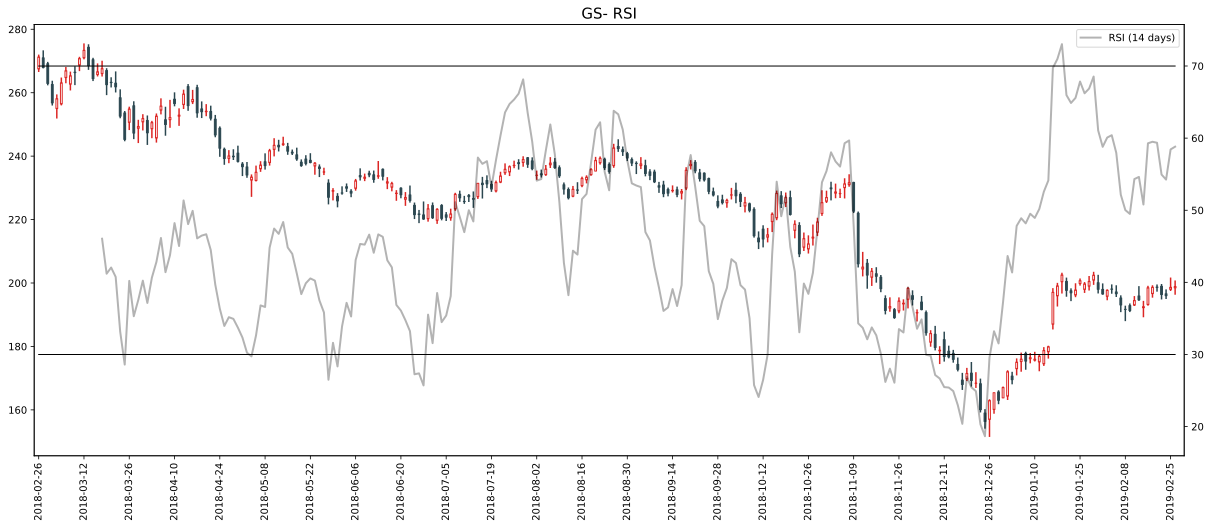

In [82]:
mpl_RSI('GS', data)

### PyEcharts 图

In [83]:
code = 'GS'
stock = data[data['Symbol']==code]

date = stock['Date'].dt.strftime('%d-%b-%Y')
price = stock[['Open', 'Close', 'Low', 'High']].values

kline = Kline(code + 'Chart', title_pos='center')
kline.add('K-Line', date, price, tooltip_tragger='axis',
         is_datazoom_show=True, legend='top')

wp = 14
RSI = ta.RSI(np.array(stock['Close']), timeperiod=wp)

line2 = Line()
line2.add('RSI', date, RSI)
line2.add('Support', date, RSI)
line2.add('Resistance', date, 30*np.ones(np.shape(RSI)))
line2.add('Resistance', date, 70*np.ones(np.shape(RSI)))

overlap = Overlap(width=1000, height=400)
overlap.add(kline)
overlap.add(line2,yaxis_index=1, is_add_yaxis=True)
overlap.render(path=u'pyecharts images/RSI.html')

# 2 PyEcharts 多图
## 2.1 网格图

In [84]:
stock_data = pd.read_csv('data for pyecharts/1Y_Stock_Data.csv',
                        parse_dates=[0],
                        dayfirst=True)
stock_data.head().append(stock_data.tail())

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2018-02-26,AAPL,176.350006,179.389999,176.210007,178.970001,176.285675,38162200
1,2018-02-27,AAPL,179.100006,180.479996,178.160004,178.389999,175.714386,38928100
2,2018-02-28,AAPL,179.259995,180.619995,178.050003,178.119995,175.448410,37782100
3,2018-03-01,AAPL,178.539993,179.779999,172.660004,175.000000,172.375214,48802000
4,2018-03-02,AAPL,172.800003,176.300003,172.449997,176.210007,173.567078,38454000
1255,2019-02-20,GS,198.729996,199.300003,197.509995,198.600006,198.600006,2266000
1256,2019-02-21,GS,198.970001,199.449997,195.050003,196.360001,196.360001,2785900
1257,2019-02-22,GS,196.600006,197.750000,195.199997,196.000000,196.000000,2626600
1258,2019-02-25,GS,198.000000,201.500000,197.710007,198.649994,198.649994,3032200
1259,2019-02-26,GS,198.470001,200.559998,196.550003,198.899994,198.899994,2498000


In [85]:
data = pd.read_csv(r'data for pyecharts/S&P500.csv',
                  index_col=0,
                  parse_dates=True,
                  dayfirst=True)
data.head().append(data.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
2019-04-17,2916.040039,2918.000000,2895.449951,2900.449951,2900.449951,3602300000
2019-04-18,2904.810059,2908.399902,2891.899902,2905.030029,2905.030029,3506850000
2019-04-22,2898.780029,2909.510010,2896.350098,2907.969971,2907.969971,2997950000
2019-04-23,2909.989990,2936.310059,2908.530029,2933.679932,2933.679932,3635030000


In [86]:
spx = data[['Adj Close']].loc['2018-02-26':'2019-02-26']
spx.head().append(spx.tail())

,Adj Close
Date,
2018-02-26,2779.600098
2018-02-27,2744.280029
2018-02-28,2713.830078
2018-03-01,2677.669922
2018-03-02,2691.250000
2019-02-20,2784.699951
2019-02-21,2774.879883
2019-02-22,2792.669922
2019-02-25,2796.110107


In [87]:
data = pd.read_csv('data for pyecharts/VIX.csv',
                  index_col=0,
                  parse_dates=True,
                  dayfirst=True)
data.head().append(data.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
2019-04-17,12.120000,13.020000,11.030000,12.600000,12.600000,0
2019-04-18,12.800000,13.120000,12.020000,12.090000,12.090000,0
2019-04-22,13.210000,13.360000,12.380000,12.420000,12.420000,0
2019-04-23,12.660000,12.690000,12.080000,12.280000,12.280000,0


In [88]:
data.drop(['Volume'], axis=1) # 删除一列

,Open,High,Low,Close,Adj Close
Date,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000
1990-01-09,22.200001,22.200001,22.200001,22.200001,22.200001
1990-01-10,22.440001,22.440001,22.440001,22.440001,22.440001
1990-01-11,20.049999,20.049999,20.049999,20.049999,20.049999
1990-01-12,24.639999,24.639999,24.639999,24.639999,24.639999


In [89]:
vix = data[['Adj Close']].loc['2018-02-26':'2019-02-26']
vix.head().append(vix.tail())

,Adj Close
Date,
2018-02-26,15.800000
2018-02-27,18.590000
2018-02-28,19.850000
2018-03-01,22.469999
2018-03-02,19.590000
2019-02-20,14.020000
2019-02-21,14.460000
2019-02-22,13.510000
2019-02-25,14.850000


In [90]:
code = 'AAPL'
stock = stock_data[stock_data['Symbol']==code]

date = stock['Date'].dt.strftime('%d-%b-%Y')
price = stock[['Open','Close','Low','High']].values

kline = Kline(code, title_pos='left')
kline.add('', date, price, tooltip_tragger='axis', is_datazoom_show=True)

line1 = Line('SPX', title_top='55%')
kline.add('', date, spx.values, yaxis_min=2200, yaxis_max=3000,
         mark_point=['min'], is_dataroom_show=True,
         data_zoom_xaxis_index=[2,1,0])

line2 = Line('VIX', title_top='75%')
line2.add('', date, vix.values, yaxis_min=0, yaxis_max=40,
         mark_point=['max'],is_dataroom_show=True,
         datazoom_xaxis_index=[2,1,0])


grid = Grid(width=1000, height=600)
grid.add(line2, grid_top='75%')
grid.add(line1, grid_top='55%', grid_bottom='30%')
grid.add(kline, grid_top='5%', grid_bottom='50%')
grid.render(path='pyecharts images/AAPL&VIX.html')

In [91]:
from pyecharts import Bar
 
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

bar = Bar("main title",'sub_title')
bar.add("服装", ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"], [5, 20, 36, 10, 75, 90],is_more_utils=True)
bar.render(path='pyecharts images/demoBar.html')

## 2.2 时间线轮播图

In [92]:
data = stock_data[['Date', 'Symbol', 'Adj Close', 'Volume']]
data.insert(1, 'Year', pd.DatetimeIndex(data['Date']).year)
data.insert(2, 'Month', pd.DatetimeIndex(data['Date']).month)
data.head().append(data.tail())

,Date,Year,Month,Symbol,Adj Close,Volume
0,2018-02-26,2018,2,AAPL,176.285675,38162200
1,2018-02-27,2018,2,AAPL,175.714386,38928100
2,2018-02-28,2018,2,AAPL,175.448410,37782100
3,2018-03-01,2018,3,AAPL,172.375214,48802000
4,2018-03-02,2018,3,AAPL,173.567078,38454000
1255,2019-02-20,2019,2,GS,198.600006,2266000
1256,2019-02-21,2019,2,GS,196.360001,2785900
1257,2019-02-22,2019,2,GS,196.000000,2626600
1258,2019-02-25,2019,2,GS,198.649994,3032200
1259,2019-02-26,2019,2,GS,198.899994,2498000


In [93]:
def print_groups(group_obj):
    for name, group in group_obj:
        print(name)
        print(group.head())
        
grouped = data.groupby(['Symbol','Year','Month'])
grouped.head().append(grouped.tail())

,Date,Year,Month,Symbol,Adj Close,Volume
0,2018-02-26,2018,2,AAPL,176.285675,38162200
1,2018-02-27,2018,2,AAPL,175.714386,38928100
2,2018-02-28,2018,2,AAPL,175.448410,37782100
3,2018-03-01,2018,3,AAPL,172.375214,48802000
4,2018-03-02,2018,3,AAPL,173.567078,38454000
5,2018-03-05,2018,3,AAPL,174.167923,28401400
6,2018-03-06,2018,3,AAPL,174.020172,23788500
7,2018-03-07,2018,3,AAPL,172.404770,31703500
24,2018-04-02,2018,4,AAPL,164.180008,37586800
25,2018-04-03,2018,4,AAPL,165.864349,30278000


In [94]:
print_groups(grouped)

('AAPL', 2018, 2)
        Date  Year  Month Symbol   Adj Close    Volume
0 2018-02-26  2018      2   AAPL  176.285675  38162200
1 2018-02-27  2018      2   AAPL  175.714386  38928100
2 2018-02-28  2018      2   AAPL  175.448410  37782100
('AAPL', 2018, 3)
        Date  Year  Month Symbol   Adj Close    Volume
3 2018-03-01  2018      3   AAPL  172.375214  48802000
4 2018-03-02  2018      3   AAPL  173.567078  38454000
5 2018-03-05  2018      3   AAPL  174.167923  28401400
6 2018-03-06  2018      3   AAPL  174.020172  23788500
7 2018-03-07  2018      3   AAPL  172.404770  31703500
('AAPL', 2018, 4)
         Date  Year  Month Symbol   Adj Close    Volume
24 2018-04-02  2018      4   AAPL  164.180008  37586800
25 2018-04-03  2018      4   AAPL  165.864349  30278000
26 2018-04-04  2018      4   AAPL  169.036072  34605500
27 2018-04-05  2018      4   AAPL  170.208206  26933200
28 2018-04-06  2018      4   AAPL  165.854523  35005300
('AAPL', 2018, 5)
         Date  Year  Month Symbol   Adj Cl

In [95]:
# 获取月底数据
group = grouped.apply(lambda df: df.iloc[-1:])
group.head(3).append(group.tail(3))

Date  Year  Month Symbol   Adj Close    Volume
Symbol Year Month                                                         
AAPL   2018 2     2   2018-02-28  2018      2   AAPL  175.448410  37782100
            3     23  2018-03-29  2018      3   AAPL  165.263504  38398500
            4     44  2018-04-30  2018      4   AAPL  162.781296  42427400
JD     2018 12    717 2018-12-31  2018     12     JD   20.930000  19422400
       2019 1     738 2019-01-31  2019      1     JD   24.850000  19318400
            2     755 2019-02-26  2019      2     JD   26.590000  20264100

In [96]:
attr = data.Symbol.unique()
n_stock = len(attr)

MV = group['Adj Close'] * group['Volume']
value = np.reshape(MV.values, (n_stock, -1))
date = group['Date'].dt.strftime('%d-%b-%Y').unique()

timeline = Timeline(is_auto_play=True, timeline_bottom=0,
                   width=800, height=400)

for i, d in enumerate(date):
    pie = Pie('Pie Chart', background_color='white', title_pos='left')
    pie.add('', attr, value[:,i], is_label_show=True, radius=[30,65], 
                legend_pos='right', legend_orient='vertical')
    timeline.add(pie, d)
    
#timeline
timeline.render(path=u'pyecharts images/Pie.html')

In [3]:
# 词云图
attr = ['北京', '上海', '深圳', '广州', '杭州', '美国', '新加坡', '武汉', '成都', '西安',
       '南京', '天津', '重庆', '长沙', '苏州', '郑州', '厦门', '香港', '合肥', '澳大利亚',
       '大连', '青岛', '济南', '沈阳', '哈尔滨', '长春', '福州', '英国', '加拿大', '佛山',
       '珠海', '南昌', '宁波', '东莞', '日本', '昆明', '石家庄', '南宁', '无锡', '德国',
       '太原', '贵阳', '廊坊', '烟台', '唐山', '兰州', '常州', '中山', '温州', '保定']
count = [2058, 1695, 923, 605, 568, 446, 418, 364, 357, 346,
        293, 153, 130, 126, 120, 116, 111, 111, 100, 99,
        94, 93, 86, 79, 79, 69, 67, 66, 61, 59,
        57, 54, 53, 51, 43, 41, 41, 41, 38, 38,
        34, 32, 30, 26, 23, 23, 23, 22, 22, 20]

wordcloud = WordCloud('用户分布', width=800, height=500)
wordcloud.add('', attr, count, shape='star', word_size_range=[20,100])
wordcloud.render(path=u'pyecharts images/WordCloud.html')

In [4]:
s = 0
for c in count:
    s += c
    
print(s)

10604


In [5]:
new_count = np.array(count)

In [6]:
type(new_count)

numpy.ndarray

In [7]:
new_count.sum()

10604